# Exploratory Data Analysis on Habermans Dataset


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("haberman.csv",names=["Age","Year_of_Operation","Positive_nodes","Survival_Status"])


In [2]:
df.head()

,Age,Year_of_Operation,Positive_nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df.tail()


,Age,Year_of_Operation,Positive_nodes,Survival_Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [4]:
#Checking the number of datapoints in the dataset
df.shape

(306, 4)

In [5]:
#Checking for balanced and imbalanced dataset
df["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

1) Clearly the dataset is imbalanced as 225 points belong to class 1
   and 81 points belong to class 2

2) Approximately 74% people live for 5 years and more after detection of cancer nodes

3) Approximately 26% people lived for less than 5 years after detection of cancer nodes


Let's check if we can relate the age of a person to the number of nodes detected

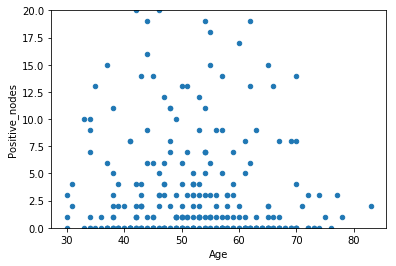

In [6]:
df.plot(kind="scatter",x="Age",y="Positive_nodes",ylim=(0,20))
plt.show()

1) It can be roughly said from the above plot tha mainly people between the age 32 to 70 have the highest number of positive nodes.

2) No definite conclusion can be drawn as datapoints are evenly distributed

In [7]:
df["Survival_Status"]=df["Survival_Status"].map({1:"yes",2:"no"})

In [8]:
df.head()

,Age,Year_of_Operation,Positive_nodes,Survival_Status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [9]:
df.tail()

,Age,Year_of_Operation,Positive_nodes,Survival_Status
301,75,62,1,yes
302,76,67,0,yes
303,77,65,3,yes
304,78,65,1,no
305,83,58,2,no


Now plotting pair plots to check the relationship between different features and labels in the output

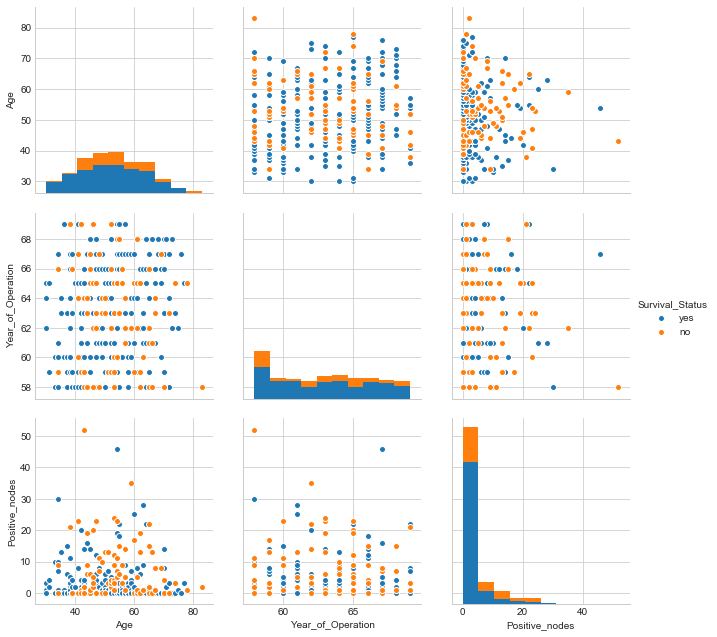

In [10]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df,hue="Survival_Status",size=3)
plt.show()

In the above pair plots most of the points are overlapping therefore nothing can be concluded by observing the pairplots

# Plotting 1-D Scatter plot, pdfs and cdfs for further analysis

In [11]:
survived_yes=df.loc[df["Survival_Status"]=="yes"]
survived_no=df.loc[df["Survival_Status"]=="no"]

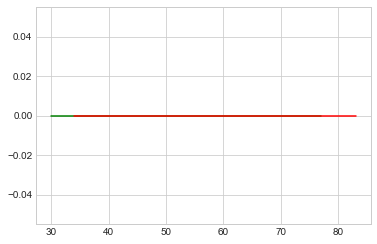

In [12]:
plt.plot(survived_yes["Age"],np.zeros_like(survived_yes["Age"]),'g')
plt.plot(survived_no["Age"],np.zeros_like(survived_no["Age"]),'r')
plt.show()

1) A lot of points in the univariate analysis are overlapping.

2) It can only be concluded with surity that people between age 30 to 33 survived for more than 5 years

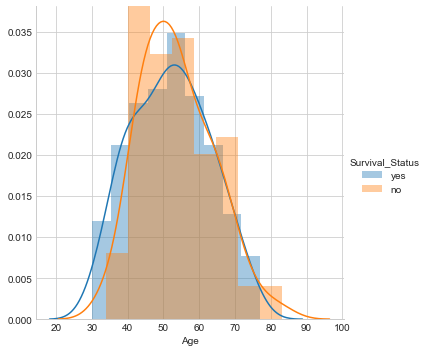

In [13]:
sns.FacetGrid(df,hue="Survival_Status",size=5)\
   .map(sns.distplot,"Age")\
   .add_legend()
plt.show()

In the given dataset people in age from 42 to 50 survived the least

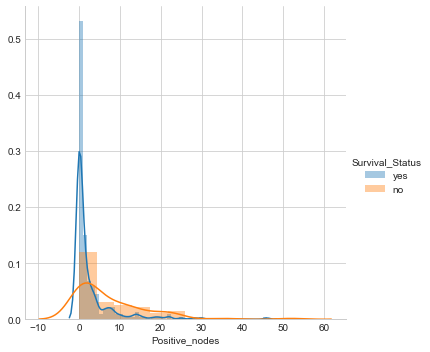

In [14]:
plt.close()
sns.FacetGrid(df,hue="Survival_Status",size=5)\
   .map(sns.distplot,"Positive_nodes")\
   .add_legend()
plt.show()

From the above plot it can be clearly seen that people with lesser number of nodes less than 4 lived for more than 5 years

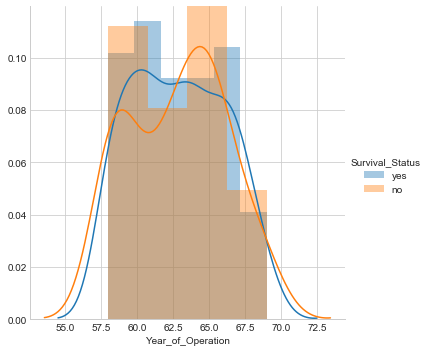

In [15]:
sns.FacetGrid(df,hue="Survival_Status",size=5)\
   .map(sns.distplot,"Year_of_Operation")\
   .add_legend()
plt.show()

Patients operated between the year 1963 and 1967 survived the lowest

# PLotting PDFS and CDFS

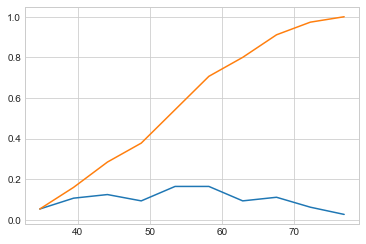

In [16]:
counts, bin_edges = np.histogram(survived_yes['Age'], bins=10, 
                                 density = True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

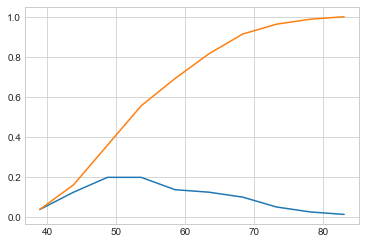

In [17]:
counts, bin_edges = np.histogram(survived_no['Age'], bins=10, 
                                 density = True)
pdf=counts/sum(counts)
plt.close()
plt.plot(bin_edges[1:],pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

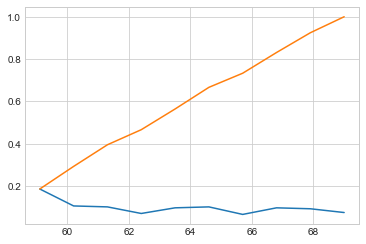

In [18]:
counts, bin_edges = np.histogram(survived_yes['Year_of_Operation'], bins=10, 
                                 density = True)
pdf=counts/sum(counts)
plt.close()
plt.plot(bin_edges[1:],pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

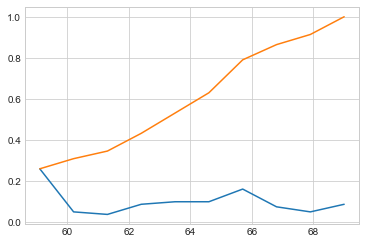

In [19]:
counts, bin_edges = np.histogram(survived_no['Year_of_Operation'], bins=10, 
                                 density = True)
pdf=counts/sum(counts)
plt.close()
plt.plot(bin_edges[1:],pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

# Mean, Variance and standard deviation

In [20]:
print("The mean of the ages of the survived people is:")
print(np.mean(survived_yes["Age"]))

The mean of the ages of the survived people is:
52.01777777777778


In [21]:
print("The mean of the number of nodes detecetd in the people who survived for more than 5 years is:")
print(np.mean(survived_yes["Positive_nodes"]))

The mean of the number of nodes detecetd in the people who survived for more than 5 years is:
2.7911111111111113


In [22]:
print("The mean of the ages of the survived people is:")
print(np.mean(survived_no["Age"]))

The mean of the ages of the survived people is:
53.67901234567901


In [23]:
print("The mean of the number of nodes detecetd in the people who survived for less than 5 years is:")
print(np.mean(survived_no["Positive_nodes"]))

The mean of the number of nodes detecetd in the people who survived for less than 5 years is:
7.45679012345679


It can be clearly observed from the above stats that the average #nodes for people who did'nt survive is greater than the people who survived

In [24]:
print("Std Deviation of number of nodes")
print(np.std(survived_yes["Positive_nodes"]))

Std Deviation of number of nodes
5.857258449412131


In [25]:
print("Std Deviation of number of nodes for people who didn't survive")
print(np.std(survived_no["Positive_nodes"]))

Std Deviation of number of nodes for people who didn't survive
9.128776076761632


In [26]:
print("Median of ages of people who survived")
print(np.median(survived_yes["Age"]))

Median of ages of people who survived
52.0


In [27]:
print("Median of ages of people who didn't survive")
print(np.median(survived_no["Age"]))

Median of ages of people who didn't survive
53.0


In [28]:
print("Median of #nodes of people who survived")
print(np.median(survived_yes["Positive_nodes"]))

Median of #nodes of people who survived
0.0


In [29]:
print("Median of #nodes of people who didn't survive")
print(np.median(survived_no["Positive_nodes"]))

Median of #nodes of people who didn't survive
4.0


In [30]:
print("Median of year of operation for people who survived")
print(np.median(survived_yes["Year_of_Operation"]))

Median of year of operation for people who survived
63.0


The year is 1963

In [31]:
print("Median of year of operation for people who survived")
print(np.median(survived_no["Year_of_Operation"]))

Median of year of operation for people who survived
63.0


The year is 1963

In [32]:
print("The 0th,25th,50th and 75th percentile of the #nodes of people who survived are:")
print(np.percentile(survived_yes["Positive_nodes"],np.arange(0, 100, 25)))


The 0th,25th,50th and 75th percentile of the #nodes of people who survived are:
[0. 0. 0. 3.]


In [33]:
print("The 0th,25th,50th and 75th percentile of the #nodes of people who didn't survive are:")
print(np.percentile(survived_no["Positive_nodes"],np.arange(0,100,25)))


The 0th,25th,50th and 75th percentile of the #nodes of people who didn't survive are:
[ 0.  1.  4. 11.]


For the people who didn't survive <br>

75% people have nodes less than 11

In [34]:
print("The 0th,25th,50th and 75th percentile of the #nodes of people who survived are:")
print(np.percentile(survived_yes["Age"],np.arange(0, 100, 25)))

The 0th,25th,50th and 75th percentile of the #nodes of people who survived are:
[30. 43. 52. 60.]


75% of people who survived have age less than 60

In [35]:
print("The 0th,25th,50th and 75th percentile of the #nodes of people who didn't survive are:")
print(np.percentile(survived_no["Age"],np.arange(0, 100, 25)))

The 0th,25th,50th and 75th percentile of the #nodes of people who didn't survive are:
[34. 46. 53. 61.]


75% of people who didn't survive have age less than 60 <br>

As observed from previous stats too, ages of the two classes of people is almost overlapping 

# Box plot with whiskers

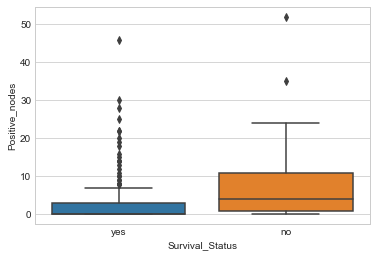

In [36]:
#Considering the node parameter first
sns.boxplot(x='Survival_Status',y='Positive_nodes',data=df)

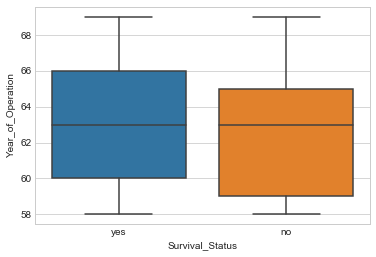

In [37]:
#Considering the year of operation
sns.boxplot(x='Survival_Status',y='Year_of_Operation',data=df)

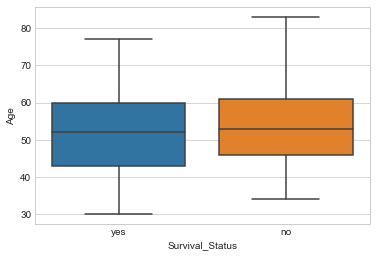

In [38]:
sns.boxplot(x='Survival_Status',y='Age',data=df)

# Violin plots

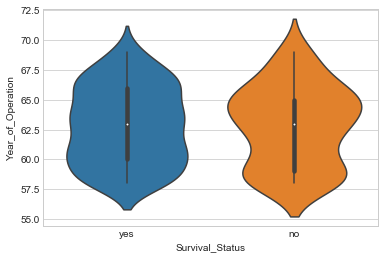

In [39]:
sns.violinplot(x="Survival_Status", y="Year_of_Operation",data=df, size=8)

plt.show()

In [ ]:
# sns.violinplot(x="Survival_Status", y="Age",data=df, size=8)

plt.show()

# Multivariate Analysis

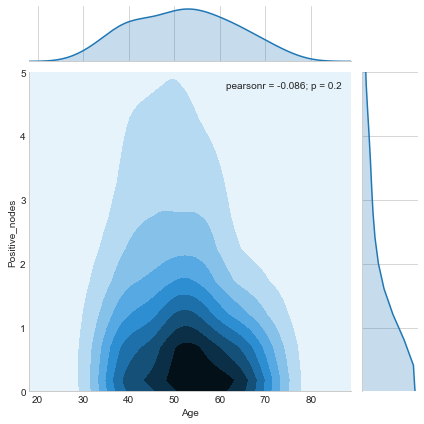

In [44]:
#2D Density plot of people who survived
sns.jointplot(x="Age",y="Positive_nodes", data=survived_yes, kind="kde",ylim=(0,5));
plt.show();


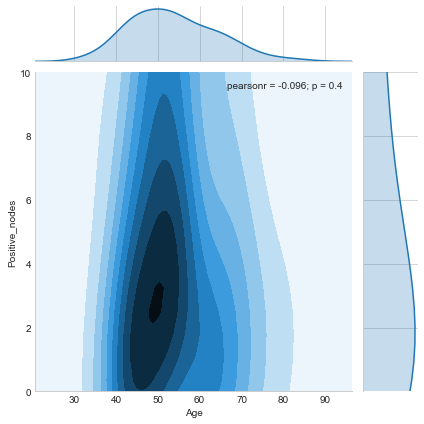

In [47]:
#2D Density plot of people who didn't survive
sns.jointplot(x="Age",y="Positive_nodes", data=survived_no, kind="kde",ylim=(0,10));
plt.show();

From the above contour plots it can be observed that:-<br>
1)The majority of people who survived cancer had age b/w 50-60 and no.of nodes 0 or 1<br>
2)The mjoirty of people who didn't sirvive cancer had age b/w 45-50 and no. of nodes b/w 2-4

# Conclusion from EDA on the Dataset 

1) Approximately 74% people live for 5 years and more after detection of cancer nodes

2) Approximately 26% people lived for less than 5 years after detection of cancer nodes

3) It can only be concluded with surity that almost all the people between age 30 to 33 survived for more than 5 years

4) Patients operated between the year 1963 and 1967 survived the lowest

5) The mean of the number of nodes detecetd in the people who survived for more than 5 years is:
   2.7911111111111113
   
6) The mean of the number of nodes detecetd in the people who survived for less than 5 years is:
   7.45679012345679
   
7) The mean of the ages of the survived people is: 52.01777777777778
   
8) The mean of the ages of the survived people is: 53.67901234567901
   
9) For the people who didn't survive 75% people have nodes less than 11

10) For the people who survived 75% people have nodes less than 3

11) The majority of people who survived cancer had age b/w 50-60 and no.of nodes 0 or 1

12) The mjoirty of people who didn't sirvive cancer had age b/w 45-50 and no. of nodes b/w 2-4
